<a href="https://colab.research.google.com/github/Mani1881/gfg/blob/main/Copy_of_flight_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

data = pd.read_csv('/content/sample_data/flight_delay/flight_delay_predict.csv')
data.head()


,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
0,1.0,2014,1,1,1,3,2014-01-01,UA,LAX,CA,ORD,IL,900.0,0.0,0.0,1744.0,7.0,43.0,43.0,218.0
1,0.0,2014,1,1,1,3,2014-01-01,AA,IAH,TX,DFW,TX,1750.0,0.0,0.0,224.0,1.0,2.0,2.0,50.0
2,1.0,2014,1,1,1,3,2014-01-01,AA,LAX,CA,ORD,IL,1240.0,0.0,0.0,1744.0,7.0,26.0,26.0,220.0
3,1.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,LAX,CA,1905.0,0.0,0.0,1235.0,5.0,159.0,159.0,169.0
4,0.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,CLT,NC,1115.0,0.0,0.0,936.0,4.0,-13.0,0.0,108.0


In [ ]:
data.shape


(637723, 20)

In [ ]:
data.isnull().sum()

is_delay             0
Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 1
DestState            1
CRSDepTime           1
Cancelled            1
Diverted             1
Distance             1
DistanceGroup        1
ArrDelay             1
ArrDelayMinutes      1
AirTime              1
dtype: int64

In [ ]:
label_encoder = LabelEncoder()

data['Origin'] = label_encoder.fit_transform(data['Origin'])
data['Dest'] = label_encoder.fit_transform(data['Dest'])

print(data.dtypes)

is_delay             float64
Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                 int64
OriginState           object
Dest                   int64
DestState             object
CRSDepTime           float64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup        float64
ArrDelay             float64
ArrDelayMinutes      float64
AirTime              float64
dtype: object


In [ ]:
avg_delay_by_origin = data.groupby('Origin')['ArrDelay'].mean().reset_index()

bar_plot = px.bar(avg_delay_by_origin, x='Origin', y='ArrDelay',
                 title='Average Arrival Delay by Origin Airport')
bar_plot.update_layout(xaxis_title='Origin Airport', yaxis_title='Average Arrival Delay')

bar_plot.show()


In [ ]:
avg_delay_by_dest = data.groupby('Dest')['ArrDelay'].mean().reset_index()

bar_plot_dest = px.bar(avg_delay_by_dest, x='Dest', y='ArrDelay', title='Average Arrival Delay by Destination Airport')
bar_plot_dest.update_layout(xaxis_title='Destination Airport', yaxis_title='Average Arrival Delay (minutes)')

bar_plot_dest.show()


<Axes: >

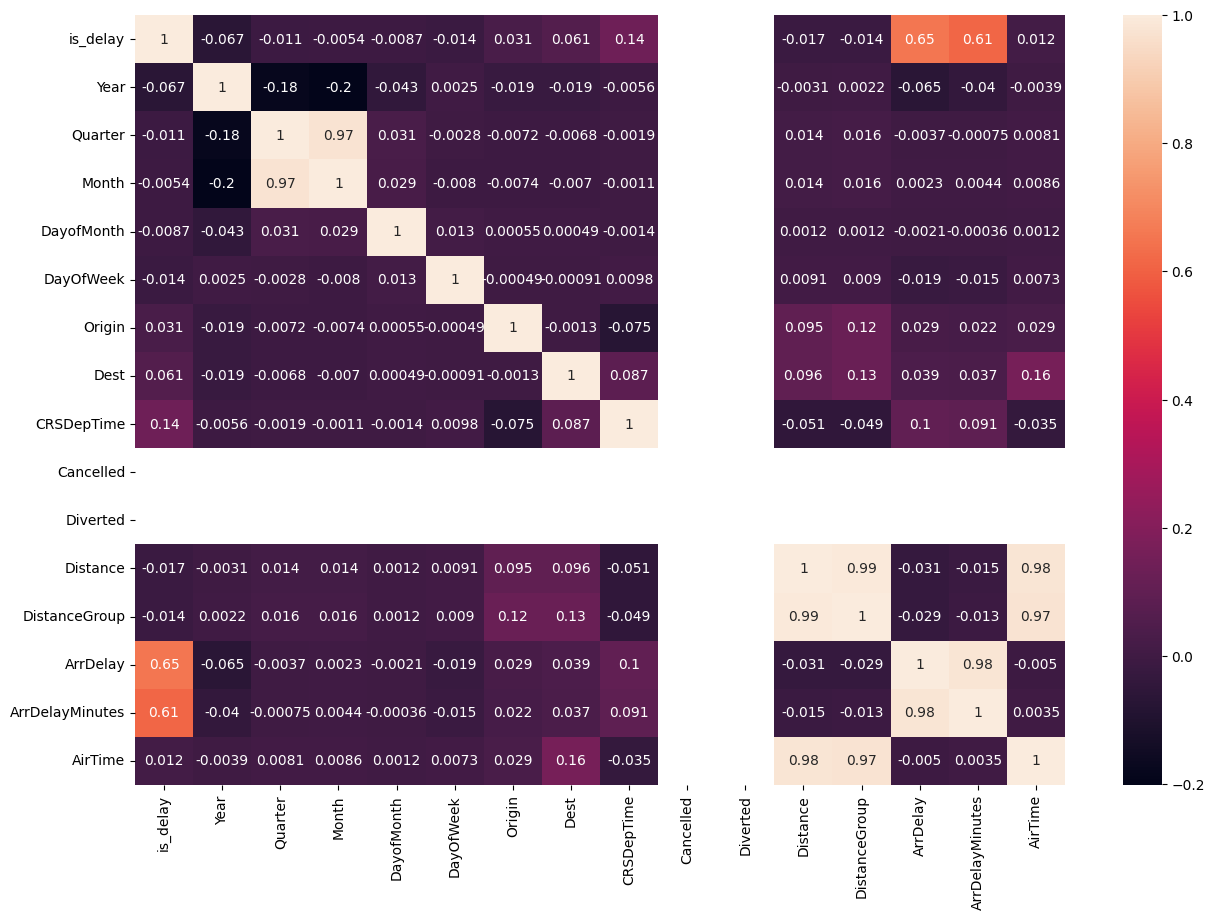

In [ ]:
numeric_data = data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot = True)


In [ ]:
data['FlightDate'] = pd.to_datetime(data['FlightDate'])

avg_delay_month = data.groupby(data['FlightDate'].dt.month)['is_delay'].mean().reset_index()
fig = px.bar(avg_delay_month, x='FlightDate', y='is_delay', labels={'FlightDate': 'Month', 'is_delay': 'Average Delay'},
             title='Average Delay by Month')
fig.update_traces(marker_color='skyblue')
fig.show()

In [ ]:
# Splitting the data into training and testing sets
X = data[['AirTime', 'Distance']]
y = data[['ArrDelayMinutes', 'is_delay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
score, accuracy = model.evaluate(X_test, y_test, verbose=0)

model.save('/kaggle/working/model.h5')


Epoch 1/5
15944/15944 [==============================] - 61s 4ms/step - loss: 732.8886 - accuracy: 0.9995
Epoch 2/5
15944/15944 [==============================] - 42s 3ms/step - loss: 723.8492 - accuracy: 1.0000
Epoch 3/5
15944/15944 [==============================] - 41s 3ms/step - loss: 722.9862 - accuracy: 1.0000
Epoch 4/5
15944/15944 [==============================] - 38s 2ms/step - loss: 722.3484 - accuracy: 1.0000
Epoch 5/5
15944/15944 [==============================] - 36s 2ms/step - loss: 722.0554 - accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:

# Real-time Prediction
air_time = float(input("Enter Air Time in minutes: "))
distance = float(input("Enter Distance in miles: "))
user_input = np.array([[air_time, distance]])
user_input_scaled = scaler.transform(user_input)
predictions = model.predict(user_input_scaled)
if predictions[0][1] >= 0.5:
    print(f"The flight is delayed by {predictions[0][0]} minutes.")
else:
    print("The flight is not delayed.")


Enter Air Time in minutes: 300
Enter Distance in miles: 1720


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 268ms/step
The flight is delayed by 83.91549682617188 minutes.
